# SIMULATION ATTACK 1+2

## 1) Importation des librairies et creation de fonction

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Choisir de manière aléatoire A (Attaquant) ou B (le réseau)
def AouB(proba):
    Block=np.random.choice(('A','B'),p=[proba,1-proba])
    return Block

# Simulation 1+2
def Simulation(proba):
    Tentative1=AouB(proba)
    #AXX
    if(Tentative1 =='A'):
        Tentative2=AouB(proba)
        Tentative3=AouB(proba)
        #AAX
        if(Tentative2 =='A'):
            #AAA
            if(Tentative3 =='A'):
                return 3,3,3
            #AAB
            else:
                P=(1-proba)*proba**2
                return 2,2,2
        #ABX
        else:
            #ABA
            if(Tentative3 =='A'):
                P=(1-proba)*proba**2
                return 2,2,2
            #ABB
            else:
                P=proba*(1-proba)**2
                return 0,2,-2
        #BXX
    else:
        P=(1-proba)**3
        return 0,1,-1
    #Return => Reward,Block,nombre de blocks minés(positive => Attaquant ou négative => Réseau)
    
# Répétition de l'attaque 1+2 nombre de fois
def Résultat(nombre=5,proba=0.41):
    ER=0
    EH=0
    Miner=[]
    for i in range(nombre):
        r,h,m = Simulation(proba)
        ER += r
        EH += h
        Miner.append(m)
    return ER,EH,Miner

# Rendement
def Rendement(ER,EH,proba):
    # Rendement expérimental
    R_exp=ER/EH
    #Rendement théorique
    R_theo=(3*proba**3+4*(1-proba)*proba**2)/((1-proba)+3*proba**3+4*(1-proba)*proba**2+2*(1-proba)**2*proba)
    return R_exp,R_theo

## 2) Seuil de Rentabilité

### a) Paramétrage

In [3]:
#Parametres
nombre=10000
L_proba=np.arange(0.01,0.5,0.01)

#Values
ER=[]
EH=[]
Miner=[]

#Liste Rendement par probabilité
L_Rdt_Exp=[]
L_Rdt_theo=[]
for i in L_proba:
    er,eh,m=Résultat(nombre,i)
    Miner.append(m)
    ER.append(er)
    EH.append(eh)
    E,T = Rendement(er,eh,i)
    L_Rdt_Exp.append(E)
    L_Rdt_theo.append(T)

### b) Résultat

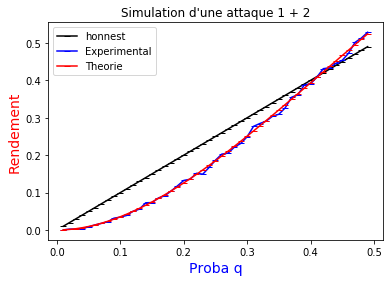

In [4]:
fig,ax=plt.subplots()
plt.title('Simulation d\'une attaque 1 + 2')
ax.plot(L_proba,L_proba,marker="_",color='black')
ax.plot(L_proba,L_Rdt_Exp,marker="_",color='blue')
ax.plot(L_proba,L_Rdt_theo,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
ax.legend(['honnest','Experimental','Theorie'])
idxExp = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp))).flatten() #index intersection Exp
idxTheo = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_theo))).flatten() #index intersection Theo

plt.show()

In [5]:
print("Valeur min de Rentabilité =>",np.sqrt(2)-1)
print("Valeur min de Rdt Expérimental => ",L_proba[idxExp[0]])
print("Valeur min de Rdt Théorique => ",L_proba[idxTheo[0]])

Valeur min de Rentabilité => 0.41421356237309515
Valeur min de Rdt Expérimental =>  0.41000000000000003
Valeur min de Rdt Théorique =>  0.41000000000000003


## 3) Avantage

In [6]:
# Répartion du nombre de blocks minés par A et par B (le réseau)
def BlockTeam(M):
    TeamA=0
    TeamB=0
    for i in M:
        if i>0:
            TeamA+=i
        else:
            TeamB+=abs(i)
    return TeamA,TeamB

### a) total de blocks minés entre les 2 parties

In [7]:
TeamA=[]
TeamB=[]
for M in Miner:
    TA,TB = BlockTeam(M)
    TeamA.append(TA)
    TeamB.append(TB)

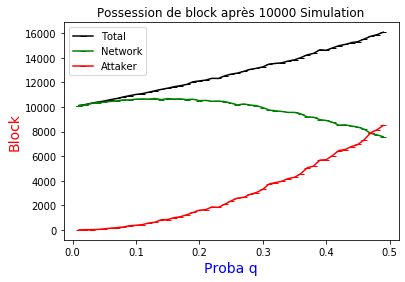

In [8]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,EH,marker="_",color='black')
ax.plot(L_proba,TeamB,marker="_",color='green')
ax.plot(L_proba,TeamA,marker="_",color='red')
ax.legend(['Total','Network','Attaker'])
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)

plt.show()

### b) Ratio de blocks minés entre les 2 parties

In [9]:
RatioBlockA=[]
RatioBlockB=[]
for index in range(len(EH)):
    RatioBlockA.append(TeamA[index]/EH[index])
    RatioBlockB.append(TeamB[index]/EH[index])

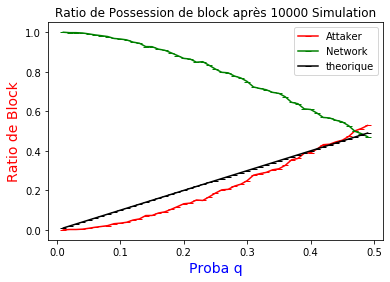

In [15]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation')
ax.plot(L_proba,RatioBlockA,marker="_",color='red')
ax.plot(L_proba,RatioBlockB,marker="_",color='green')
ax.plot(L_proba,L_proba,marker="_",color='black')
ax.legend(['Attaker','Network','theorique'])
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

### c) Nombres de Reward par block miné en fonction de la puissance

In [16]:
RewardParSimulationA=[]
for index in range(len(ER)):
    RewardParSimulationA.append(ER[index]/nombre)

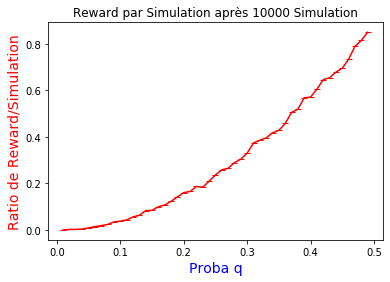

In [17]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation')
ax.plot(L_proba,RewardParSimulationA,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

<h1><center>Fin Du TD</center></h1>